In [89]:
import numpy as np
from math import sin, cos, log10
import matplotlib.pyplot as plt
#from numba import jit

In [132]:
function = 'sin(x)'
n = 25
a = -15
b = 15

In [133]:
F = np.zeros(n, dtype=np.float64)
X = np.linspace(a, b, num = n)
for idx, x in np.ndenumerate(X):
    F[idx] = eval(function)

In [134]:
#@jit
def LagrangeInterpolation(point, X, Y):
    xp = point
    yp = 0
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p = p * (xp - X[j])/(X[i] - X[j])
        yp = yp + p * Y[i]
        
    return yp

In [135]:
newX = np.linspace(a, b, num = n * 10, dtype=np.float64)
iF = np.zeros(n * 10, dtype=np.float64)
newF = np.zeros(n * 10, dtype=np.float64)
serror = 0
for idx, x in np.ndenumerate(newX):
    iF[idx] = LagrangeInterpolation(newX[idx], X, F)
    newF[idx] = eval(function)
    serror = abs((iF[idx] - newF[idx])/iF[idx])
avgerr = serror / (n * 10)
print('ошибочка вышла:', avgerr)

ошибочка вышла: 0.0


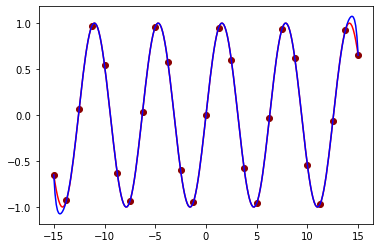

In [136]:
plt.plot(X, F, color='#8b0000', marker='o', linewidth=0)
plt.plot(newX, newF, color='red')
plt.plot(newX, iF, 'blue')
plt.show()